## Task

Our (hypothetical) marketing department needs some help in focussing on the most important market segment. Instead of marketing to everyone, they need our help in identifying who our most profitable customers are. Are they married or unmarried, working or retired, premium or budget buyers etc… This will help them position things better.

Also, they need help in identifying the bestselling products.

So, given the transaction data, help us identify the top 3 most profitable products and characteristics of our most loyal customers.  Also include your hypothesis of why you think the loyal customers like

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
purchase_df = pd.read_csv("/content/purchase_behaviour.csv")
transaction_df = pd.read_csv("/content/transaction_data.csv")

# Data Overview
print("Purchase Behaviour Data:")
purchase_df.head()

Purchase Behaviour Data:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
print("\nTransaction Data:")
transaction_df.head()


Transaction Data:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
print("\nPurchase Behaviour Data Info:")
purchase_df.info()


Purchase Behaviour Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
print("\nTransaction Data Info:")
transaction_df.info()


Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
# Top 3 Most Profitable Products
top_products = (
    transaction_df.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(3)
)
print("\nTop 3 Most Profitable Products:")
top_products


Top 3 Most Profitable Products:


,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [9]:
# Loyal Customer Analysis
loyal_customers = (transaction_df.groupby("LYLTY_CARD_NBR").agg(total_spent=("TOT_SALES", "sum"), total_transactions=("TXN_ID", "count")).reset_index().sort_values(by=["total_transactions", "total_spent"], ascending=False).head(10))
print("\nLoyal Customers:")
loyal_customers


Loyal Customers:


,LYLTY_CARD_NBR,total_spent,total_transactions
42813,162039,126.8,18
45905,172032,120.1,18
60925,230078,138.6,17
31654,116181,117.6,17
3686,13138,109.0,17
34943,128178,99.7,17
25958,94185,122.8,16
47959,179228,120.8,16
6530,23192,114.7,16
28605,105026,114.2,16


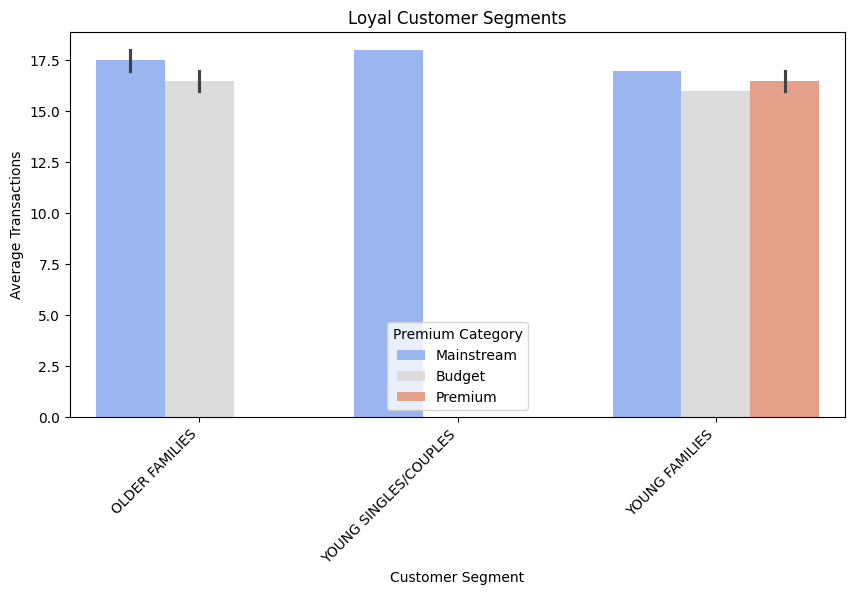

In [13]:
# Merge with purchase_df to get customer demographics
loyal_customers = pd.merge(loyal_customers, purchase_df, on="LYLTY_CARD_NBR", how="left")

# Calculate average transactions
loyal_customers["avg_transactions"] = loyal_customers["total_transactions"]

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(
    data=loyal_customers,
    x="LIFESTAGE",
    y="avg_transactions",
    hue="PREMIUM_CUSTOMER",
    palette="coolwarm",
)
plt.xticks(rotation=45, ha="right")
plt.title("Loyal Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Average Transactions")
plt.legend(title="Premium Category")
plt.show()

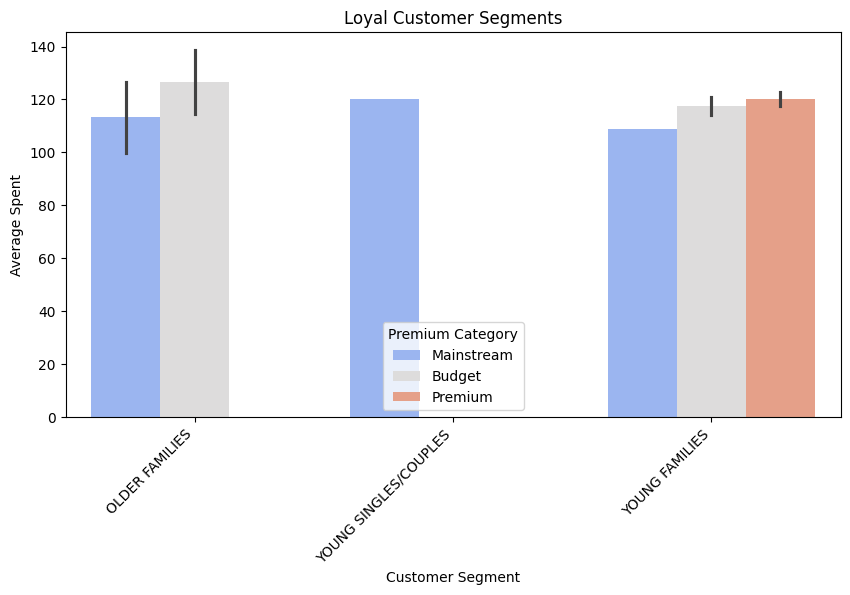

In [16]:
# Calculate average transactions
loyal_customers["avg_spent"] = loyal_customers["total_spent"]

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(
    data=loyal_customers,
    x="LIFESTAGE",
    y="avg_spent",
    hue="PREMIUM_CUSTOMER",
    palette="coolwarm",
)
plt.xticks(rotation=45, ha="right")
plt.title("Loyal Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Average Spent")
plt.legend(title="Premium Category")
plt.show()

<ipython-input-10-95e398999fc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")


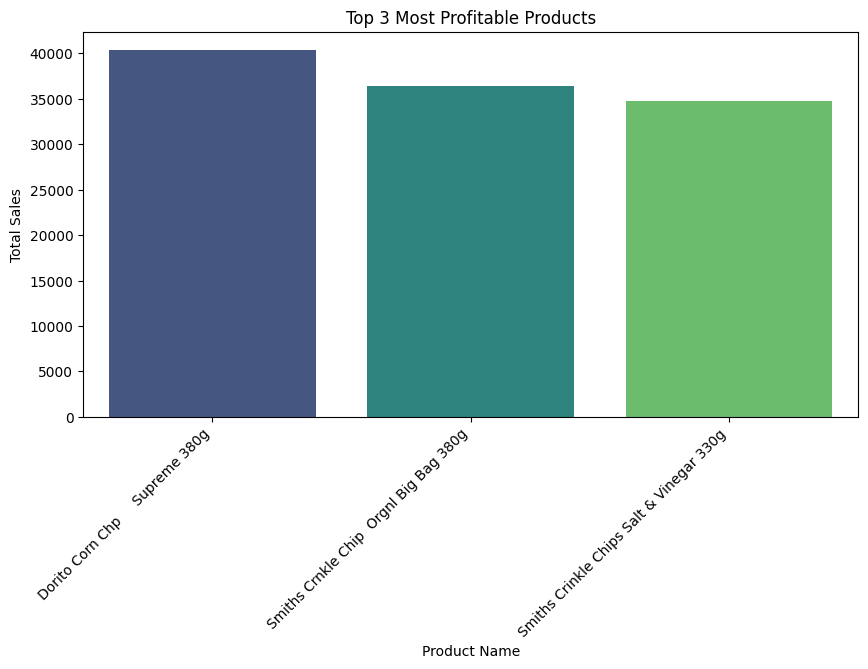

In [10]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

**Summary Report: Customer & Product Analysis**

### **1. Overview**
This analysis identifies the most profitable products and the characteristics of our most loyal customers using transaction data and purchase behavior insights.

### **2. Top 3 Most Profitable Products**
The highest revenue-generating products are:
1. **Dorito Corn Chips Supreme 380g** - ₹40,352.0 total sales
2. **Smiths Crinkle Chips Original Big Bag 380g** - ₹36,367.6 total sales
3. **Smiths Crinkle Chips Salt & Vinegar 330g** - ₹34,804.2 total sales

These products are likely popular due to brand recognition, taste preference, and bulk purchasing trends.

### **3. Loyal Customer Analysis**
Loyal customers are those with frequent transactions and high spending. The most loyal customer segments are:

1. **Young Singles/Couples (Mainstream)**  
   - **Avg. Spend:** ₹120.10  
   - **Avg. Transactions:** 18.0  
2. **Older Families (Mainstream)**  
   - **Avg. Spend:** ₹113.25  
   - **Avg. Transactions:** 17.5  
3. **Young Families (Mainstream)**  
   - **Avg. Spend:** ₹109.00  
   - **Avg. Transactions:** 17.0  

### **4. Hypothesis on Loyalty Behavior**
- **Young Singles/Couples (Mainstream) are the most frequent buyers**, possibly due to snacking habits and convenience-based purchases.
- **Older Families exhibit high loyalty**, likely due to bulk purchases for household consumption.
- **Young Families (Budget & Premium) also rank high**, suggesting balanced preferences for affordability and quality.

### **5. Business Recommendations**
1. **Marketing Focus**: Target young singles and couples with promotional campaigns on bestselling products.
2. **Product Positioning**: Enhance visibility of top-selling products with in-store promotions.
3. **Loyalty Programs**: Offer incentives for frequent buyers, especially in the mainstream category.

This analysis provides valuable insights to optimize marketing strategies and drive customer engagement.

